### **Descrição do Problema, Dados e Variáveis**  

#### **Problema**  
O **State of Data Brazil 2023** mapeia o **mercado de trabalho na área de dados no Brasil**, identificando **tendências, desafios e oportunidades** para profissionais como **cientistas de dados, engenheiros de dados e analistas de dados**. A pesquisa analisa **perfis profissionais, remuneração, rotatividade, impacto do trabalho remoto, uso de tecnologias emergentes (AI Generativa e LLMs) e fatores de satisfação**.  

---

#### **Variáveis Relevantes**  

##### **Informações Pessoais**  
- **Identificador único** (`P0`)  
- **Idade** (`P1_a`), **Faixa etária** (`P1_a_1`)  
- **Gênero** (`P1_b`), **Cor/Raça/Etnia** (`P1_c`)  
- **Indica se é PCD** (`P1_d`)  

#### **Impacto na Experiência Profissional**  
- **Experiência profissional foi afetada?** (`P1_e`)  
- **Motivos do impacto**:  
  - **Raça/Etnia** (`P1_e_2`), **Gênero** (`P1_e_3`), **PCD** (`P1_e_4`)  

#### **Aspectos Profissionais Prejudicados**  
- **Quantidade de vagas recebidas** (`P1_f_1`)  
- **Nível das vagas x experiência** (`P1_f_2`)  
- **Sucesso em processos seletivos** (`P1_f_3`)  
- **Oportunidades de crescimento** (`P1_f_4`)  
- **Rapidez na progressão de carreira** (`P1_f_5`)  
- **Pressão e stress no trabalho** (`P1_f_6`)  
- **Consideração dada às ideias** (`P1_f_7`)  
- **Relação com colegas no trabalho e eventos sociais** (`P1_f_8`, `P1_f_9`)  

#### **Localização**  
- **Reside no Brasil?** (`P1_g`)  
- **Estado de residência** (`P1_i`)  

#### **Atividades Profissionais Específicas**  
- **Criação/manutenção de infraestrutura (clusters, servidores, APIs, containers, etc.)** (`P8_d_11`)  
- **Uso de LLMs para solucionar problemas de negócio** (`P8_d_12`)  

---

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Get File Path and load Dataframe

In [ ]:
def get_file_path():
    import os
    # Load the data
    if os.path.exists('/kaggle'):
        file_path = '/kaggle/input/state-of-data-brazil-2023/State_of_data_BR_2023_Kaggle - df_survey_2023.csv'
    else:
        default_directory = '/home/nerton/Projects/kaggle'
        os.chdir(default_directory)
        file_path = './input/state-of-data-brazil-2023⁄State_of_data_BR_2023_Kaggle.csv'
    return file_path


In [ ]:
# Carregando o DataFrame
file_path = get_file_path()
df = pd.read_csv(file_path)
df.head()



### Listar Colunas

In [ ]:
from pprint import pprint

# Listar os nomes das colunas no DataFrame de forma legível
columns = df.columns.tolist()
print("Colunas do DataFrame:")
pprint(columns)

### **Análise Univariada** - Funções  

#### **1. Variáveis Qualitativas**  
- **1.1** Distribuição de Variável Qualitativa  
- **1.2** Gráfico de Distribuição de Variável Qualitativa  

#### **2. Variáveis Quantitativas**  
- **2.1** Distribuição de Variável Quantitativa  
- **2.2** Gráfico de Distribuição de Variável Quantitativa  

In [240]:
# Análise Qualitativa de Colunas
def analyze_quali_column(column_name):
    try:
        print(f"Análise da Coluna: {column_name}")
        print(f"Valores Únicos: {df[column_name].unique()}")
        print(f"Quantidade de Valores Únicos: {df[column_name].nunique()}")
        print(f"Quantidade de Valores Nulos: {df[column_name].isnull().sum()}")
        print(f"Valores Nulos: {df[column_name][df[column_name].isnull()]}")
        print(f"Contagem de Frequência dos Valores: {df[column_name].value_counts()}")
        print("\n")
    except Exception as e:
        print(f"Ocorreu um erro durante a análise qualitativa: {e}")
    return

def make_graph_column(column_name):
    try:
        import matplotlib.pyplot as plt
        import seaborn as sns
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, x=column_name, order=df[column_name].value_counts().index)
        plt.xticks(rotation=90)
        plt.show()
    except Exception as e:
        print(f"Ocorreu um erro ao gerar o gráfico: {e}")
    return

# Análise Quantitativa de Colunas
def analyze_quanti_column(column_name):
    try:
        print(f"Análise da Coluna: {column_name}")
        print(f"Valores Únicos: {df[column_name].unique()}")
        print(f"Quantidade de Valores Únicos: {df[column_name].nunique()}")
        print(f"Quantidade de Valores Nulos: {df[column_name].isnull().sum()}")
        print(f"Valores Nulos: {df[column_name][df[column_name].isnull()]}")
        print(f"Média: {df[column_name].mean()}")
        print(f"Mediana: {df[column_name].median()}")
        print(f"Desvio Padrão: {df[column_name].std()}")
        print(f"Valor Mínimo: {df[column_name].min()}")
        print(f"Valor Máximo: {df[column_name].max()}")
        print("\n")
    except Exception as e:
        print(f"Ocorreu um erro durante a análise quantitativa: {e}")
    return

def make_histogram_column(column_name):
    try:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 5))
        df[column_name].dropna().plot(kind='hist', bins=20, edgecolor='black')
        plt.title(f'Distribuição da Variável Quantitativa: {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequência')
        plt.show()
    except Exception as e:
        print(f"Ocorreu um erro ao gerar o histograma: {e}")
    return

Análise da Coluna: ('P1_b ', 'Geanero')
Ocorreu um erro durante a análise qualitativa: "('P1_b ', 'Geanero')"


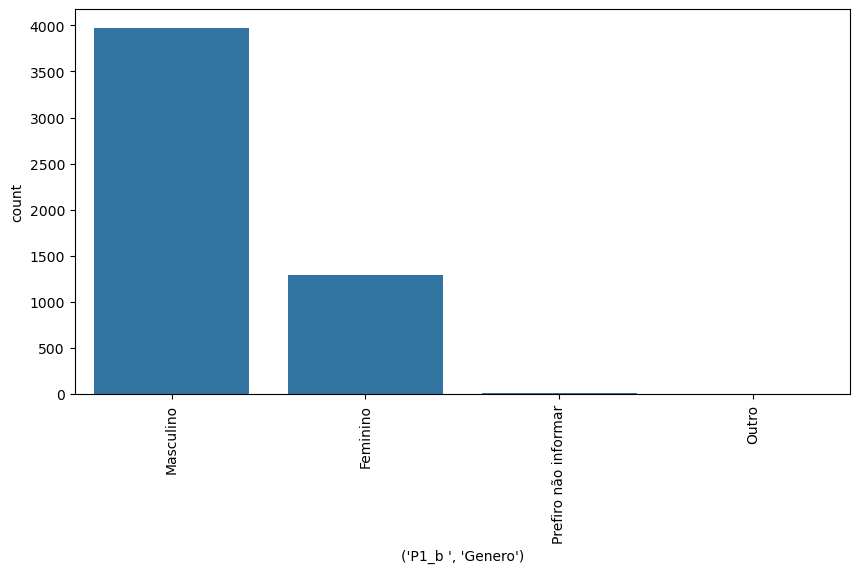

Análise da Coluna: ('P1_a ', 'Idade')
Valores Únicos: [31 30 37 22 34 24 35 27 28 25 46 32 39 36 29 44 33 38 53 23 26 50 62 43
 48 21 49 19 42 45 41 40 54 20 55 47 69 59 51 58 70 18 63 57 60 73 52 61
 64 65 56 72 66]
Quantidade de Valores Únicos: 53
Quantidade de Valores Nulos: 0
Valores Nulos: Series([], Name: ('P1_a ', 'Idade'), dtype: int64)
Média: 31.997166068392215
Mediana: 30.0
Desvio Padrão: 7.623497677250181
Valor Mínimo: 18
Valor Máximo: 73




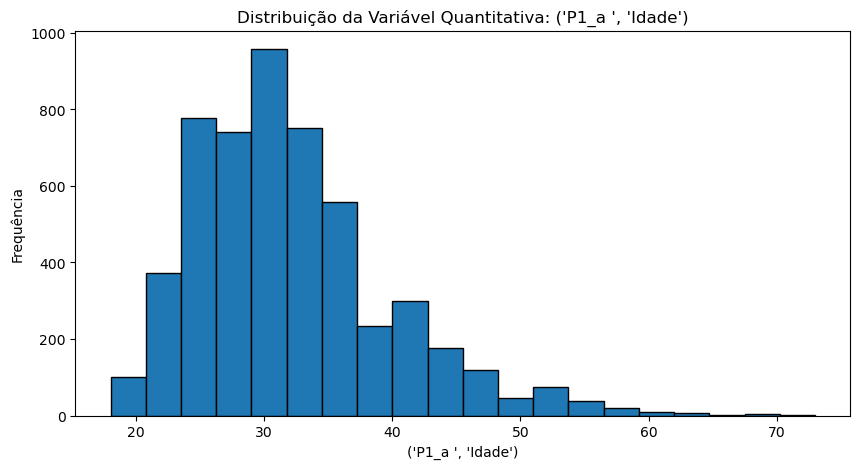

In [ ]:
#Exemplos de análise de colunas

# Análise qualitativa
analyze_quali_column("('P1_b ', 'Genero')")
make_graph_column("('P1_b ', 'Genero')")

# Análise quantitativa
analyze_quanti_column("('P1_a ', 'Idade')")
make_histogram_column("('P1_a ', 'Idade')")

### **Análise Bivariada** - Funções
- 3.1 Distribuição de Frequências
- 3.2 Figura Bivariada

In [ ]:
def bivariate_analysis(variable_1, variable_2):
    try:
        import matplotlib.pyplot as plt
        import seaborn as sns
        
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, x=variable_1, hue=variable_2, order=df[variable_1].value_counts().index)
        plt.xticks(rotation=90)
        plt.show()
    except Exception as e:
        print(f"Ocorreu um erro durante a análise bivariada: {e}")
    return